说明：关注公众号 **PyStaData**，后台回复【工作报告】获取本文代码、数据和其他资料。如有不当之处，欢迎批评指正。

# 2020年政府工作报告可视化

In [1]:
import textract
import re
import jieba
import jieba.analyse as analyse
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt

# 从 PDF 提取文本

In [2]:
pdf = textract.process("../data/2020政府工作报告.pdf", 'utf-8')
text = pdf.decode()
text = re.sub(r'\d+', '', text)  # 去除数字
text = re.sub(r'\r\n', '', text) # 去除换行符和空格

# 分词与统计词频

In [3]:
# 分词
ls = jieba.lcut(text)
stopwords = [line.strip() for line in open(
    '../requirement/user_dict.txt', 'r', encoding='utf-8').readlines()]
words = [word for word in ls
         if len(word) > 1
         and word not in stopwords
         and not re.match('^[a-z|A-Z|0-9|.]*$', word)]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\mudaozi\AppData\Local\Temp\jieba.cache
Loading model cost 2.213 seconds.
Prefix dict has been built successfully.


In [4]:
# 基于 TF-IDF 提取关键词
t = " ".join(words)
kw = " ".join(analyse.extract_tags(t, topK=20, withWeight=False, allowPOS=()))
print("2020年政府工作报告中前20个关键词：\n", kw)

2020年政府工作报告中前20个关键词：
 发展 就业 疫情 脱贫 保障 支持 加强 建设 推进 企业 坚持 防控 民生 推动 促进 全面 改革 经济 坚决 基本


In [5]:
# 词频统计
counts = {}
for word in words:
    if len(word) == 1:
        continue
    else:
        counts[word] = counts.get(word, 0) + 1
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)

# 导出词频结果
df = pd.DataFrame(items, columns=['关键词', '频次'])
df.to_csv("../result/01_词频统计结果.csv", index=None, encoding='utf_8_sig')

# 绘制词云图

## Wordcloud库绘制静态词云图

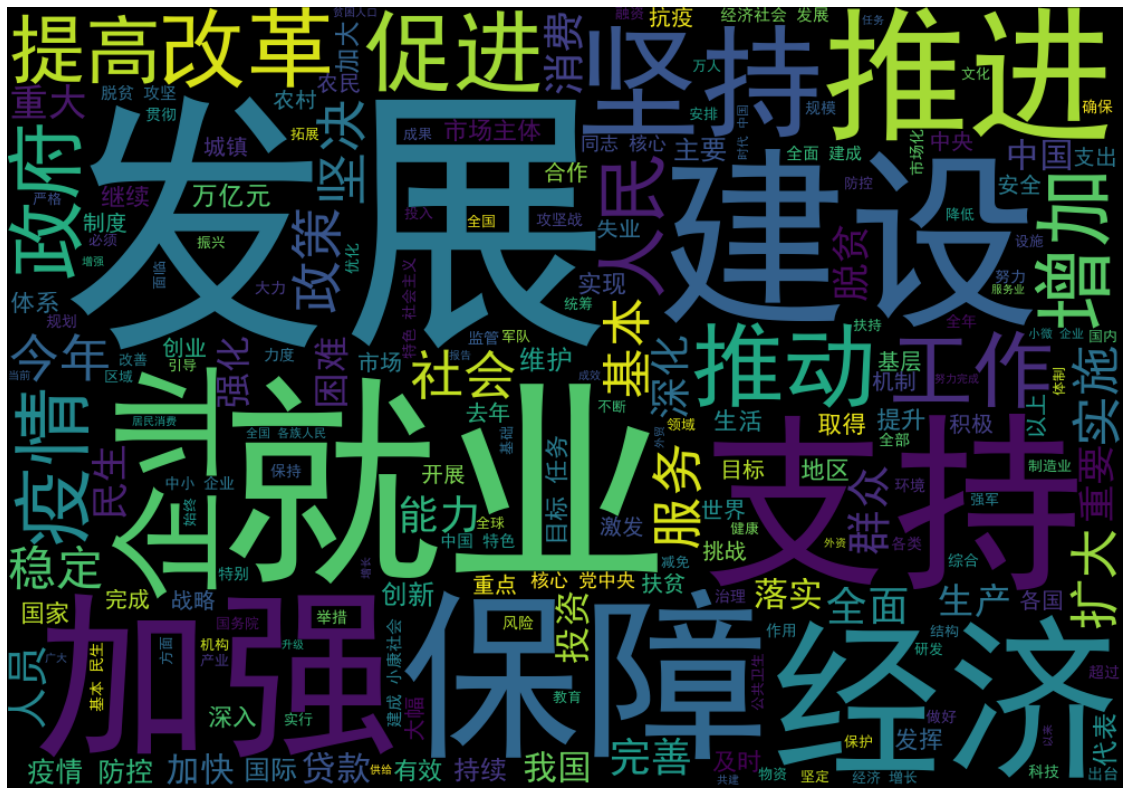

In [6]:
w = wordcloud.WordCloud(font_path="./requirement/simhei.ttf",
                        width=1000, height=700, background_color="black")
w.generate(t)
w.to_file("../result/02_2020政府工作报告词云图.png")

# 展示结果
fig = plt.figure(figsize=(20, 100))
plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pyecharts库绘制动态词云图

In [7]:
# 动态词云图
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType


def wordcloud_diamond() -> WordCloud:
    words = items
    c = (
        WordCloud()
        .add("", words, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
        .set_global_opts(title_opts=opts.TitleOpts(title="2020年政府工作报告词云图"))
    )
    return c


wordcloud_diamond().render('../result/03_2020年政府工作报告词云图.html')
wordcloud_diamond().render_notebook()